# DAT 402 Machine Learning Project 1

## Introduction

Define problem/question to be investigated

## Import Packages

In [58]:
# Import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline

from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [3]:
# The following is code from UC Irvine's website for importing their dataset.
# I have commented out their print statements in favor of viewing the dataframe.

from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
#print(adult.metadata)

# variable information
#print(adult.variables)

## Data Exploration

In [4]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [7]:
# Check the null counts

X.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [6]:
# Best check this one as well

y.isna().sum()

income    0
dtype: int64

In [8]:
X.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [46]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: >

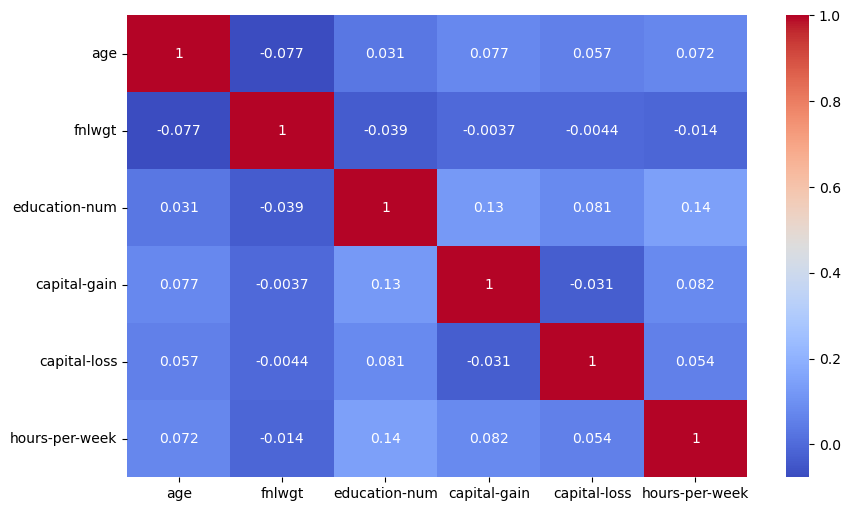

In [47]:
# View a heatmap of the correlations

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(X.corr(), cmap="coolwarm", annot=True, ax=ax)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

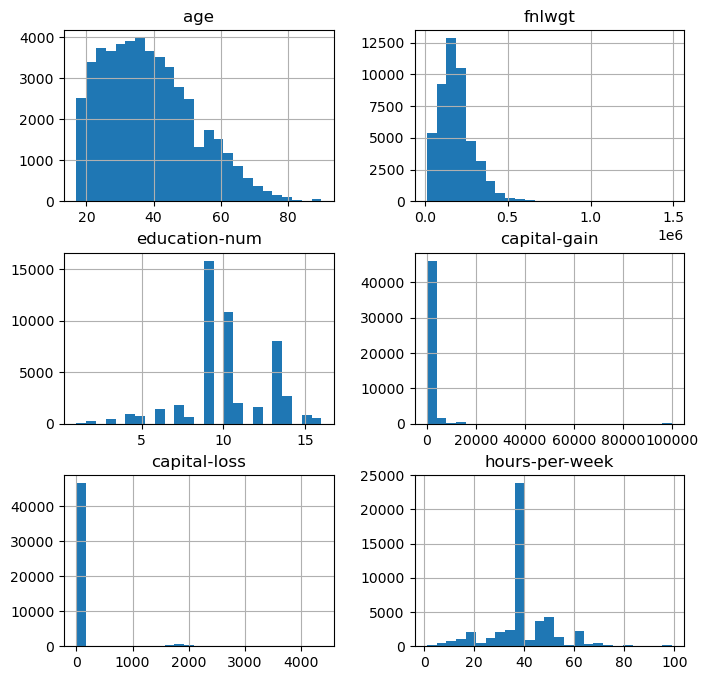

In [51]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8))

X.hist(bins=25, ax=ax1)

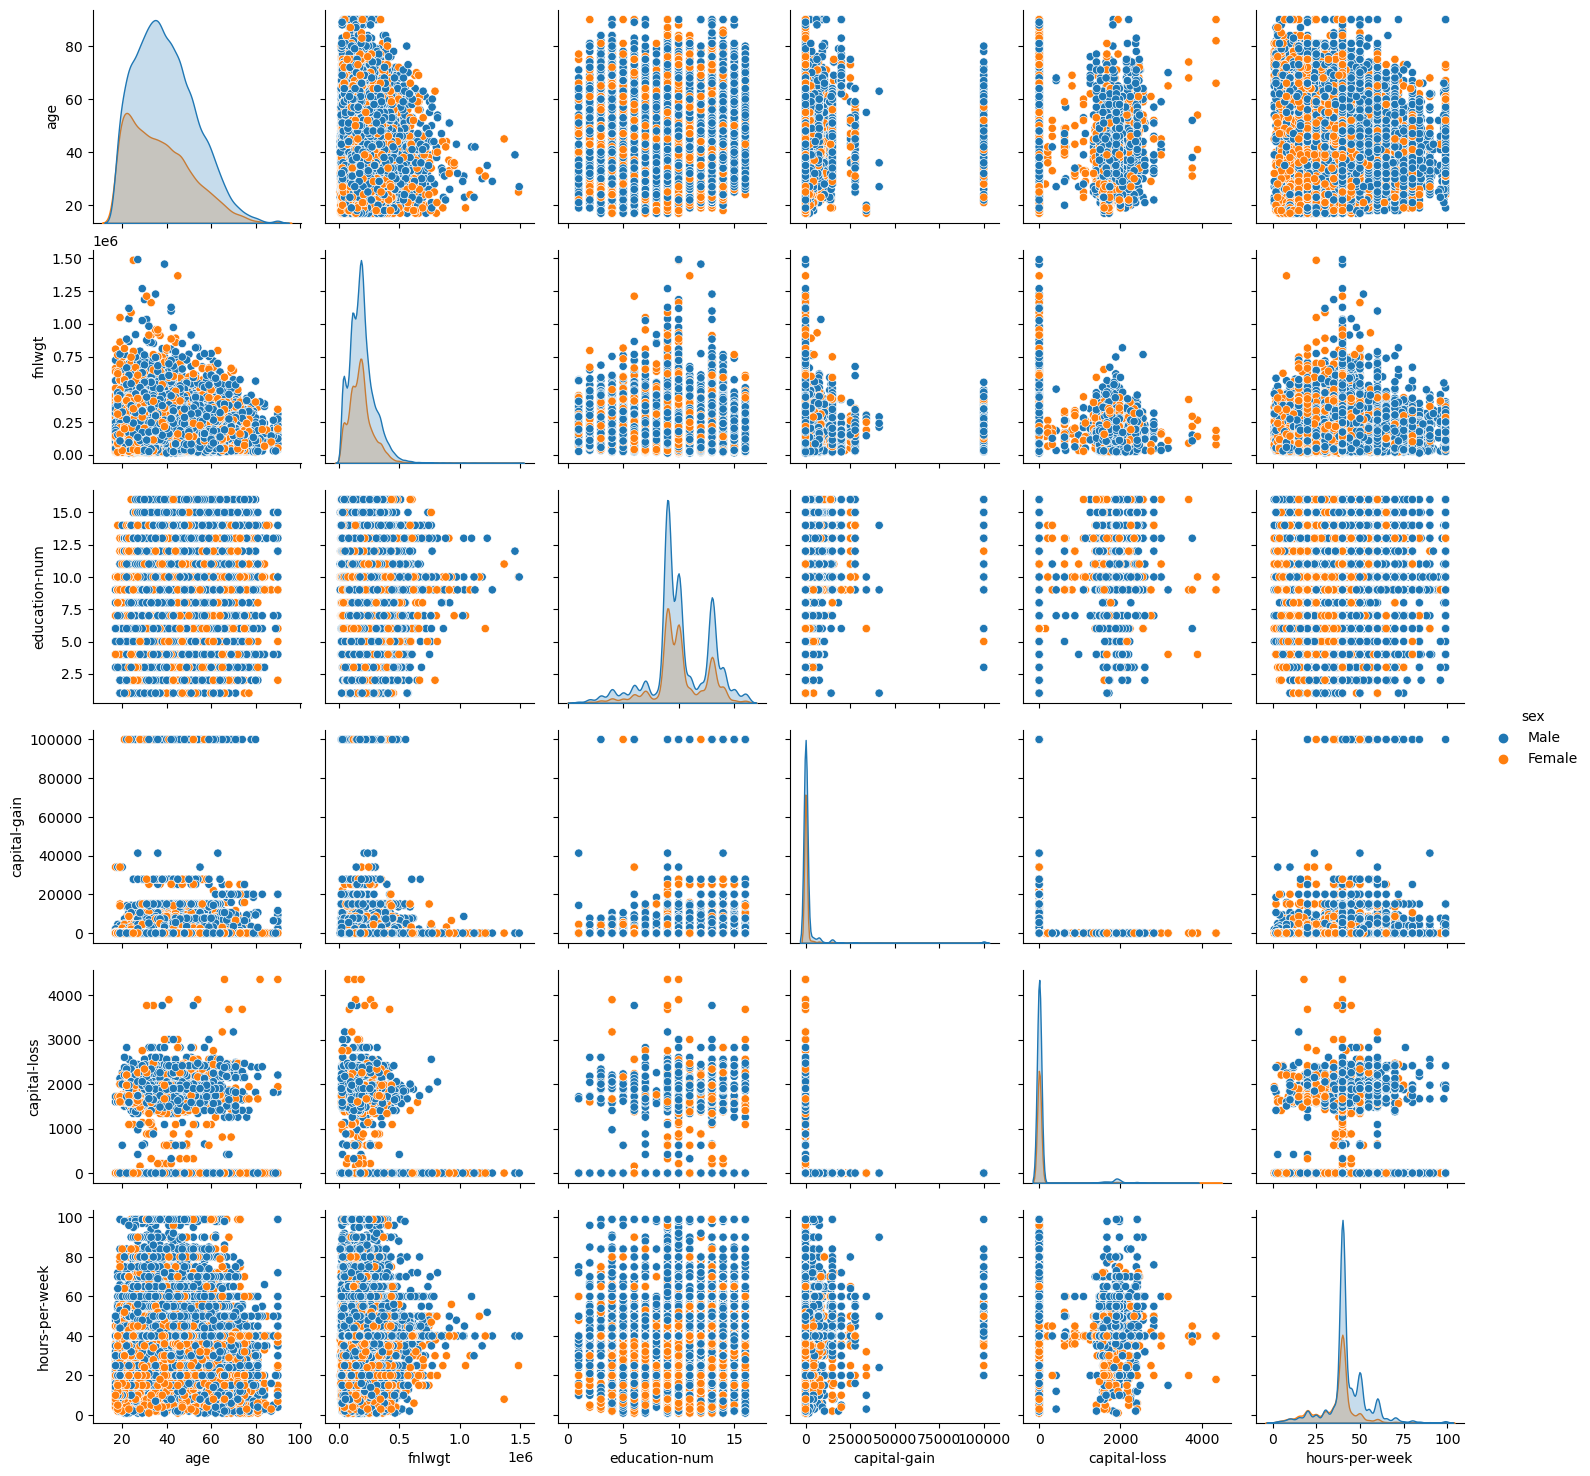

In [52]:
sns.pairplot(X, diag_kind="kde", hue="sex")

In [9]:
for col in X.select_dtypes(include=['object']):
    print(col, '\n', X[col].unique(), '\n')

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan] 

education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital-status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan] 

relationship 
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race 
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex 
 ['Male' 'Female'] 

native-country 
 ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puert

In [10]:
for col in X.select_dtypes(include='object'):
    print(col, '\n', X[col].value_counts(), '\n')

workclass 
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

education 
 HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64 

marital-status 
 Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64 

occupation 
 Prof-specialty       6172
Craft-repair    

There are some '?' values in the 'workclass', 'occupation', and 'native-country' columns that will need to be dealt with. They will be replaced by np.nan since their values are unknown.
</br></br>

## Data Cleaning/Wrangling

In [67]:
# Column 'education' will not be needed as it comes ordinally encoded in the 'education-num' column

X = X.drop(columns='education')

In [11]:
# Replace '?' values with null values

for col in X.[['workclass', 'occupation', 'native-country']]:
    X[col].replace('?', np.nan, inplace = True)

In [45]:
# Check the corrections

for col in X[['workclass', 'occupation', 'native-country']]:
    print(col,'\n',X[col].unique(),'\n')

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

native-country 
 ['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands'] 



In [13]:
X.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

In [31]:
# Check proportion of dataset that is null

(len(X) - len(X.dropna())) / len(X)

7.411653904426519

Null values represent about 7.4% of the observations in the dataset. It's a significant portion of the data, but not overwhelming. For my own curiosity, I want to model the data both by imputing the nulls and by dropping them to see how model performance changes.
</br></br>

In [54]:
# Create a second dataframe where nulls will be dropped

X2 = adult.data.features
X2['income'] = adult.data.targets

for col in X2[['workclass', 'occupation', 'native-country']]:
    X2[col].replace('?', np.nan, inplace = True)
    
X2 = X2.dropna()

y2 = X2['income']
X2 = X2.drop(columns=['income', 'education'])

print(X2.shape)
print(y2.shape)

(45222, 13)
(45222,)


In [17]:
cat_cols = X.select_dtypes(include='object').columns.tolist()

In [18]:
X_2 = X.copy()

In [19]:
encoder = OrdinalEncoder()

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(X_2[columns])

In [20]:
X_2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6.0,77516,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,38.0
1,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0
2,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0
3,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0
4,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3.0,215419,9.0,13,0.0,9.0,1.0,4.0,0.0,0,0,36,38.0
48838,64,NaN,321403,11.0,9,6.0,NaN,2.0,2.0,1.0,0,0,40,38.0
48839,38,3.0,374983,9.0,13,2.0,9.0,0.0,4.0,1.0,0,0,50,38.0
48840,44,3.0,83891,9.0,13,0.0,0.0,3.0,1.0,1.0,5455,0,40,38.0


In [21]:
X_2.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

In [22]:
knn_imputer = KNN()
X_2_prepared = pd.DataFrame(np.round(knn_imputer.fit_transform(X_2)), columns = X_2.columns)

Imputing row 1/48842 with 0 missing, elapsed time: 276.746
Imputing row 101/48842 with 0 missing, elapsed time: 276.750
Imputing row 201/48842 with 0 missing, elapsed time: 276.752
Imputing row 301/48842 with 0 missing, elapsed time: 276.754
Imputing row 401/48842 with 0 missing, elapsed time: 276.756
Imputing row 501/48842 with 0 missing, elapsed time: 276.759
Imputing row 601/48842 with 0 missing, elapsed time: 276.762
Imputing row 701/48842 with 0 missing, elapsed time: 276.763
Imputing row 801/48842 with 0 missing, elapsed time: 276.765
Imputing row 901/48842 with 0 missing, elapsed time: 276.767
Imputing row 1001/48842 with 0 missing, elapsed time: 276.769
Imputing row 1101/48842 with 2 missing, elapsed time: 276.771
Imputing row 1201/48842 with 0 missing, elapsed time: 276.774
Imputing row 1301/48842 with 0 missing, elapsed time: 276.776
Imputing row 1401/48842 with 0 missing, elapsed time: 276.778
Imputing row 1501/48842 with 0 missing, elapsed time: 276.780
Imputing row 1601/48

Imputing row 21901/48842 with 0 missing, elapsed time: 277.175
Imputing row 22001/48842 with 0 missing, elapsed time: 277.176
Imputing row 22101/48842 with 0 missing, elapsed time: 277.178
Imputing row 22201/48842 with 0 missing, elapsed time: 277.180
Imputing row 22301/48842 with 0 missing, elapsed time: 277.181
Imputing row 22401/48842 with 0 missing, elapsed time: 277.184
Imputing row 22501/48842 with 0 missing, elapsed time: 277.185
Imputing row 22601/48842 with 0 missing, elapsed time: 277.187
Imputing row 22701/48842 with 0 missing, elapsed time: 277.188
Imputing row 22801/48842 with 0 missing, elapsed time: 277.190
Imputing row 22901/48842 with 0 missing, elapsed time: 277.192
Imputing row 23001/48842 with 0 missing, elapsed time: 277.195
Imputing row 23101/48842 with 0 missing, elapsed time: 277.196
Imputing row 23201/48842 with 0 missing, elapsed time: 277.198
Imputing row 23301/48842 with 0 missing, elapsed time: 277.200
Imputing row 23401/48842 with 0 missing, elapsed time: 

Imputing row 42001/48842 with 0 missing, elapsed time: 277.604
Imputing row 42101/48842 with 0 missing, elapsed time: 277.606
Imputing row 42201/48842 with 0 missing, elapsed time: 277.610
Imputing row 42301/48842 with 1 missing, elapsed time: 277.612
Imputing row 42401/48842 with 0 missing, elapsed time: 277.614
Imputing row 42501/48842 with 0 missing, elapsed time: 277.615
Imputing row 42601/48842 with 0 missing, elapsed time: 277.617
Imputing row 42701/48842 with 0 missing, elapsed time: 277.619
Imputing row 42801/48842 with 0 missing, elapsed time: 277.621
Imputing row 42901/48842 with 0 missing, elapsed time: 277.624
Imputing row 43001/48842 with 0 missing, elapsed time: 277.626
Imputing row 43101/48842 with 2 missing, elapsed time: 277.626
Imputing row 43201/48842 with 0 missing, elapsed time: 277.628
Imputing row 43301/48842 with 0 missing, elapsed time: 277.630
Imputing row 43401/48842 with 0 missing, elapsed time: 277.631
Imputing row 43501/48842 with 0 missing, elapsed time: 

In [23]:
X_2_prepared

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,6.0,77516.0,9.0,13.0,4.0,0.0,1.0,4.0,1.0,2174.0,0.0,40.0,38.0
1,50.0,5.0,83311.0,9.0,13.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,13.0,38.0
2,38.0,3.0,215646.0,11.0,9.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,40.0,38.0
3,53.0,3.0,234721.0,1.0,7.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,40.0,38.0
4,28.0,3.0,338409.0,9.0,13.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,40.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,3.0,215419.0,9.0,13.0,0.0,9.0,1.0,4.0,0.0,0.0,0.0,36.0,38.0
48838,64.0,3.0,321403.0,11.0,9.0,6.0,4.0,2.0,2.0,1.0,0.0,0.0,40.0,38.0
48839,38.0,3.0,374983.0,9.0,13.0,2.0,9.0,0.0,4.0,1.0,0.0,0.0,50.0,38.0
48840,44.0,3.0,83891.0,9.0,13.0,0.0,0.0,3.0,1.0,1.0,5455.0,0.0,40.0,38.0


In [24]:
X_2_prepared.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [26]:
X['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [25]:
X_2_prepared['occupation'].value_counts()

9.0     6378
3.0     6319
2.0     6237
0.0     5628
11.0    5551
7.0     5368
6.0     3472
5.0     2525
13.0    2361
4.0     1846
12.0    1454
10.0    1111
8.0      521
1.0       71
Name: occupation, dtype: int64

In [55]:
X3 = X2.copy()

In [66]:
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc.fit_transform(X3.select_dtypes(include='object')).shape

(45222, 82)